# Predicting Titanic Survivors

## Data Source:
'titanic_data.csv'

## Description:
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. 
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

The point of this analysis is to predict if an individual will survive based on the features in the data like: Traveling Class, Sex, Age Fare Price and Family Size.

## Data Dictionary:

|  Field Num |  Field Name |  Description | 
| ---------- |:-----------:| ------------:|
| 1          | PassengerId | Numberic    |
| 2          | Survived | Survival (Numberic-  (0 = No; 1 = Yes))     |
| 3          | Pclass | Passenger Class (Numberic - (1 = 1st; 2 = 2nd; 3 = 3rd))     |
| 4         | Name | Last Name, First Name     |
| 5         | Sex | Sex     |
| 6         | Age | (Numeric)    |
| 7         | SibSp | Number of Siblings/Spouses Aboard     |
| 8         | Parch | Number of Parents/Children Aboard     |
| 9         | Ticket | Ticket Number |
| 10         | Fare | Passenger Fare|
| 11         | Cabin | Cabin     |
| 12        | Embarked| Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  |
                   



## Data Handling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from random import randint,uniform
from sklearn.model_selection import cross_val_score
from pandas.tests.test_msgpack.test_subtype import MyList

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC   
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('/home/ppham/workspace/titanic_data.csv')

In [13]:
df.shape

(891, 12)

Database has 891 rows x 12 columns.

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are some columns such as 'Age', 'Cabin','Embarked' have missing values. Additionally,'Tickets' and 'Cabin' have so many missing values,so they wont add much value to the result.

### Explore the Data:

In [31]:
df["Survived"].value_counts(normalize = True)

0    0.595506
1    0.404494
Name: Survived, dtype: float64

40% Passengers that survived vs 60% passengers that passed away



##### By Gender:
Males that survived vs males that passed away

In [32]:
df["Survived"][df["Sex"] == 'male'].value_counts(normalize = True)


0    0.794702
1    0.205298
Name: Survived, dtype: float64

Females that survived vs Females that passed away

In [34]:
df["Survived"][df["Sex"] == 'female'].value_counts(normalize = True)

1    0.752896
0    0.247104
Name: Survived, dtype: float64

##### By Gender and class:


In [35]:
df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts(normalize = True)


1    0.942675
0    0.057325
Name: Survived, dtype: float64

In [36]:
df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts(normalize = True)


0    0.539216
1    0.460784
Name: Survived, dtype: float64

In [39]:
df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts(normalize = True)

0    0.849802
1    0.150198
Name: Survived, dtype: float64

In [38]:
df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts(normalize = True)

0    0.725
1    0.275
Name: Survived, dtype: float64

##### By Age:
Assume age of a passenger less than 18 is 1 and greater than 18 is 0.

In [14]:
# Create the column Child and assign to 'NaN'
df["Child"] = float('NaN')

In [15]:
df["Child"][df["Age"] < 18] = 1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
df["Child"][df["Age"] >= 18] = 0

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [47]:
df["Survived"][df["Child"] == 1].value_counts(normalize = True)

1    0.539823
0    0.460177
Name: Survived, dtype: float64

In [48]:
df["Survived"][df["Child"] == 0].value_counts(normalize = True)

0    0.621035
1    0.378965
Name: Survived, dtype: float64

A passenger with age less than 18 has more survival chances compared to older passengers. Based on the breakdown, 'Gender, Class and Age are one of the important features to be considered. 

##### By Embarked:

In [19]:
df["Survived"][df["Embarked"] == 1].value_counts(normalize = True)

1    0.553571
0    0.446429
Name: Survived, dtype: float64

In [22]:
df["Survived"][df["Embarked"] == 2].value_counts(normalize = True)

0    0.61039
1    0.38961
Name: Survived, dtype: float64

In [20]:
df["Survived"][df["Embarked"] == 3].value_counts(normalize = True)

0    0.663043
1    0.336957
Name: Survived, dtype: float64

###### 'Age','Sex', 'Pclass', 'Fare' and 'Embarked' are important features. So those will be used for training my first model.

##### Final Data Preparation:
'Ticket' an 'Fare' have too many missing values. they wont addmuch to the training. So I will drop those two column first. 

In [7]:
df = df.drop(['Ticket','Cabin'],axis = 1)

In [17]:
#Convert values of 'Embakred' to number.
labelEncoder = preprocessing.LabelEncoder()
df['Embarked'] = labelEncoder.fit_transform(df['Embarked'])
#convert 'Male' and 'Female' to 0 or 1 of 'Sex' feature
df['Sex'] = labelEncoder.fit_transform(df['Sex'])

In [18]:
# fill the null value of age by the mean:
labelEncoder = preprocessing.Imputer(missing_values='NaN',strategy='mean',axis=0)
df['Age'] = labelEncoder.fit_transform(np.array(df[['Age']]))

# fill the null value of 'Fare' by the mean:
labelEncoder = preprocessing.Imputer(missing_values='NaN',strategy='mean',axis=0)
df['Fare'] = labelEncoder.fit_transform(np.array(df[['Fare']]))

# fill the null value of 'Embarked' by most frequent value:
labelEncoder = preprocessing.Imputer(missing_values='NaN',strategy='most_frequent',axis=0)
df['Embarked'] = labelEncoder.fit_transform(np.array(df[['Embarked']]))

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null float64
dtypes: float64(3), int64(6), object(1)
memory usage: 69.7+ KB


### Modeling Part 1: Train a model with features : 'Age','Sex', 'Fare', 'PClass' and 'Embarked'

In [19]:
# features including for the learning
x = df[['Pclass','Sex','Child','Fare']]
y = df['Survived']

In [20]:
# Helper function from Scikit learn to create a learning curve graph
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.5, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt

In [21]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=40)

##### Decision Tree:


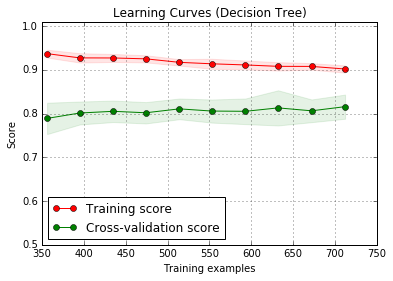

In [34]:
title = "Learning Curves (Decision Tree)"
estimator = DecisionTreeClassifier(max_depth=10)
plot_learning_curve(estimator, title, x, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

##### Neural Networks:

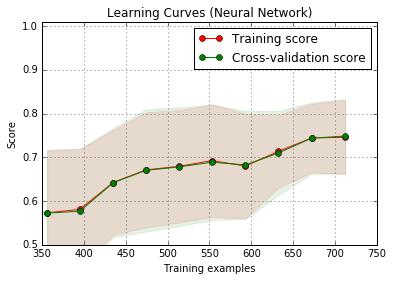

In [24]:
title = "Learning Curves (Neural Network)"
estimator = MLPClassifier(max_iter=2000)
plot_learning_curve(estimator, title, x, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

##### GradientBoosting Decision Tree:

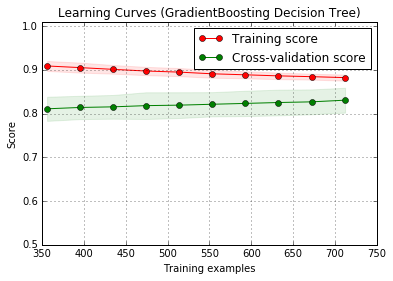

In [25]:
title = "Learning Curves (GradientBoosting Decision Tree)"
estimator = GradientBoostingClassifier(random_state=0)
plot_learning_curve(estimator, title, x, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

##### Support Vector Machine( with kernel ='rbf')

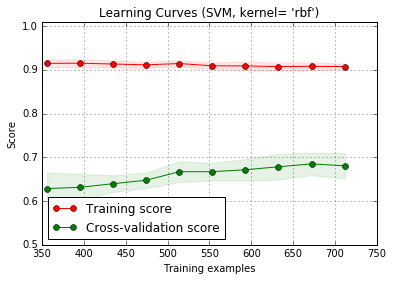

In [40]:
title = "Learning Curves (SVM, kernel= 'rbf')"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=40)
estimator = SVC()
plot_learning_curve(estimator, title, x, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

##### Support Vector Machine( with kernel ='sigmoid')

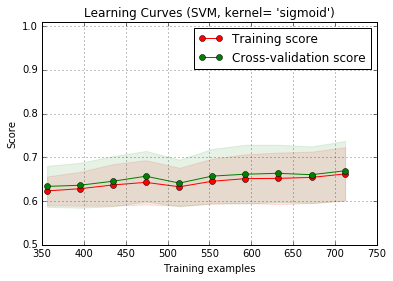

In [26]:
title = "Learning Curves (SVM, kernel= 'sigmoid')"
estimator = SVC(kernel='sigmoid')
plot_learning_curve(estimator, title, x, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

##### k-Nearest Neighbor 

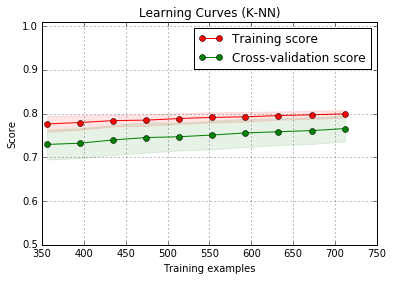

In [27]:
title = "Learning Curves (K-NN)"
estimator = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
plot_learning_curve(estimator, title, x, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

### Model Part 2: If 'Family size' can help improve the learning

Beside all features included on first model, I will create a new feature call 'FamilySize', which is the sum of feature 'SibSp' and 'Parch'. I will include feature 'FamilySize' to train the new model.

In [31]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Child,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,3.0,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1.0,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,3.0,0.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,3.0,0.0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,3.0,0.0,0


In [32]:
y = df['Survived']
x = df[['Pclass','Sex','Child','Fare', 'FamilySize']]
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=40)

##### Decision Tree

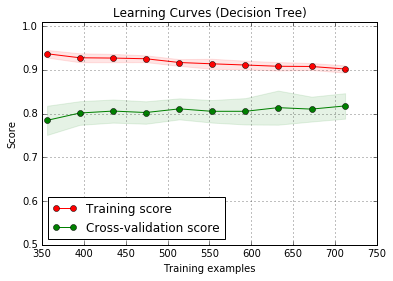

In [33]:
title = "Learning Curves (Decision Tree)"
estimator = DecisionTreeClassifier(max_depth=10)
plot_learning_curve(estimator, title, x, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

##### Neural Networks:

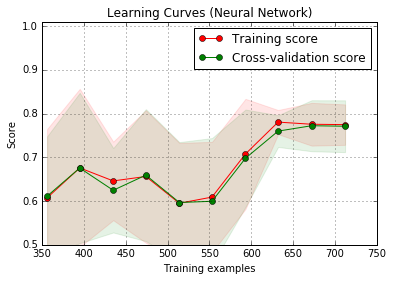

In [37]:
title = "Learning Curves (Neural Network)"
estimator = MLPClassifier(max_iter=2000)
plot_learning_curve(estimator, title, x, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

##### GradientBoosting Decision Tree

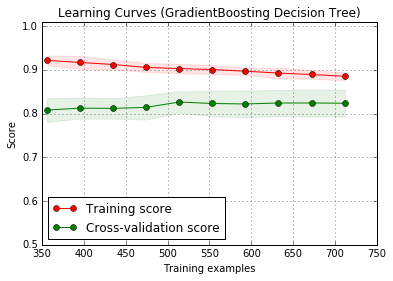

In [42]:
title = "Learning Curves (GradientBoosting Decision Tree)"
estimator = GradientBoostingClassifier(random_state=0)
plot_learning_curve(estimator, title, x, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

##### Support Vector Machines (Kernel= 'rbf)

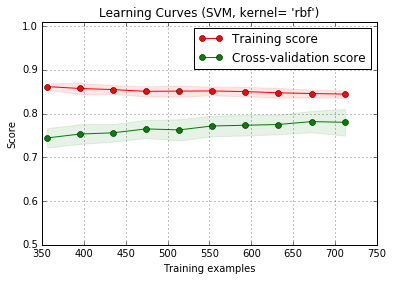

In [41]:
title = "Learning Curves (SVM, kernel= 'rbf')"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=40)
estimator = SVC()
plot_learning_curve(estimator, title, x, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

##### Support Vector Machines (Kernel='sigmoid')

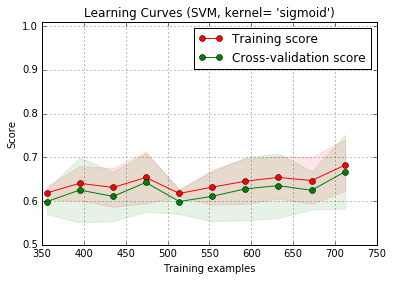

In [45]:
title = "Learning Curves (SVM, kernel= 'sigmoid')"
estimator = SVC(kernel='sigmoid')
plot_learning_curve(estimator, title, x, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

##### k-Nearest Neighbors

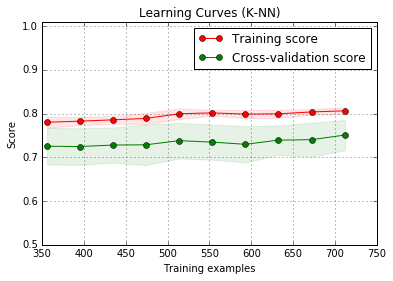

In [46]:
title = "Learning Curves (K-NN)"
estimator = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
plot_learning_curve(estimator, title, x, y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

##### Adding 'FamilySize' feature helps improve the score of the model. For example: on the first model, the SVM algorithm predict score is less than the score of second model. Additionally, it also help the model reduce overfit problem. 


In term of speed, 'Decision Tree' is the fastest algorithm. Here is my experiment results using the second classification:

| Rank        | Algorithm           | Time  |
| ------------- |:-------------:| -----:|
|1st | Decision Tree | 2.62s |
|2st | K-Nearest Neighbors |4.95s |
|3rd | Support Vector Machines (Kernel='sigmoid') | 8.66s |
|4th | Support Vector Machine (Kernel='rbf' )| 26.03 |
|5th | GradientBoosting Decision Tree| 37.38s |
|6th | Neural Networks| 95.89s |

However, Decision Tree is overfit a lot. The 'training' score and 'test' score is far away. It's also similar for GradientBoosting Decision Tree. Even though, they has highest score but i'm not convinced they are good enough for generalizing. SVM with kernel='rbf' and K-Nearest Neighbor are also overfit. SVM with kernel 'sigmoid' looks good but the error score is high. 
Therefore, my best algorithm is Neural Network. This algorithm is not overfit. The running time is not a big deal be cause it can be improved by adding hardwares.